# Trees and Forests

Decision tree is a statistical model that is used in classification. This machine learning approach is used to classify data into classes and to represent the results in a flowchart, such as a tree structure. This model classifies data in a dataset by flowing through a query structure from the root until it reaches the leaf, which represents one class. The root represents the attribute that plays a main role in classification, and the leaf represents the class. The decision tree model follows the steps outlined below in classifying data:

1. It puts all training examples to a root.

2. It divides training examples based on selected attributes.

3. It selects attributes by using some statistical measures.

4. Recursive partitioning continues until no training example remains, or until no attribute remains, or the 
 remaining training examples belong to the same class.
 
Decision tree learning is supervised, because it constructs decision tree from class-labeled training tuples. We will discuss two decision tree algorithms as follows:

a. ID3 (Iterative Dichotomiser 3)

b. C4.5 (Successor of ID3)

The statistical measure used to select attribute (that best splits the dataset in terms of given classes) in ID3 is information gain, whereas in C4.5, the criterion is gain ratio. Both measures have a close relationship with another concept called entropy.

We use Iris flower data set or Fisher's Iris data set for our practice.

In [2]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

decisiontree = DecisionTreeClassifier(random_state=0)

model = decisiontree.fit(X, y)

#New observation
observation = [[5, 4, 3, 2]]

print("The observation class is:", model.predict(observation))
# model.predict_proba(observation)  

The observation class is: [1]


Decision Tree can be used as Regressor as well.

In [11]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets 

boston = datasets.load_boston()
X = boston.data[:, 0:2]
y = boston.target

decisiontree = DecisionTreeRegressor(random_state=0)
model = decisiontree.fit(X, y)

#New observation
observation = [[0.02, 16]]

model.predict(observation)


array([33.])

Random Forest is a flexible, easy to use supervised machine learning algorithm that produces a great result most of the time. It is also one of the most used algorithms, because it’s simplicity, NO hyperparametr, and the fact that it can be used for both classification and regression tasks.

Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [4]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

randomforest = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)

model = randomforest.fit(X, y)

#New observation
observation = [[5, 4, 3, 2]]

print("The observation class is:", model.predict(observation))
print("The probibility of each class is:", model.predict_proba(observation))



The observation class is: [1]
The probibility of each class is: [[0.03 0.56 0.41]]


In [5]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data[:, 0:2]
y = boston.target

randomforest = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
model = randomforest.fit(X, y)

#New observation
observation = [[0.02, 16]]

model.predict(observation)


array([30.316])

The Random Forest Classifier can be used to detemine the important features. It can be used for feature selection.

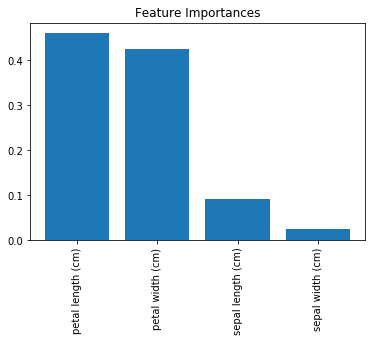

In [10]:
# Important Feature in random forest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

randomforest = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)

model = randomforest.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [iris.feature_names[i] for i in indices]

plt.figure()
plt.title("Feature Importances")

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()

In [28]:
# Selecting important features
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

iris = datasets.load_iris()
X = iris.data
y = iris.target

randomforest = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
#model = randomforest.fit(X, y)


selector = SelectFromModel(randomforest, threshold=0.3)

feature_important = selector.fit_transform(X, y)

model = randomforest.fit(feature_important, y)

#New observation
observation = [[5, 4]]

model.predict(observation)
model.predict_proba(observation)


array([[0., 0., 1.]])

Random Forest Classifier can be used to classifoes imbalanced Data. 

In [30]:
# Imbalanced Data

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# imbalancing the data
X = X[40:, :]
y = y[40:]

y = np.where((y==0), 0, 1)

randomforest = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1, class_weight='balanced')

model = randomforest.fit(X, y)
